In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [3]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

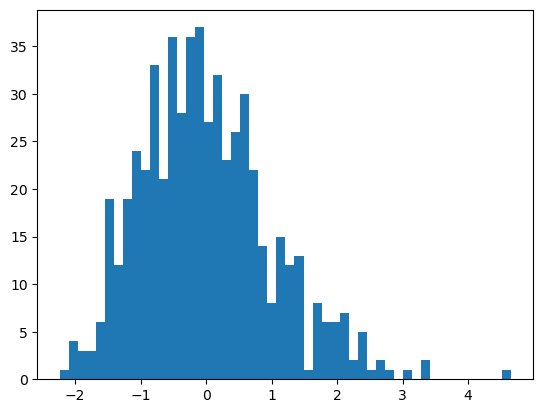

In [4]:
plt.hist(X_norm[:,1], 50);

In [5]:
X.shape, y.shape

((569, 30), (569,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)
print('The model is trained!')

The model is trained!


In [17]:
y_pred = model.predict(X_test)

In [9]:
y_pred, y_test

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0]))

In [10]:
accuracy = ((y_test - y_pred) == 0).sum() / len(y_test) * 100
print(f'The accuracy is {accuracy:.2f} %')

The accuracy is 97.37 %


In [11]:
from sklearn import metrics

In [12]:
metrics.confusion_matrix(y_test, y_pred)

array([[41,  2],
       [ 1, 70]])

In [136]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(39, 4, 1, 70)

In [137]:
70 / (70 + 1)

0.9859154929577465

In [138]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [139]:
classification_metrics(y_test, y_pred)

(0.956140350877193, 0.9859154929577465, 0.9069767441860465, 0.9459459459459459)

In [140]:
metrics.recall_score(y_test, y_pred)

0.9859154929577465

In [120]:
y_test.sort()

In [160]:
prob = model.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test_sorted, prob_sorted)

0.9980347199475925

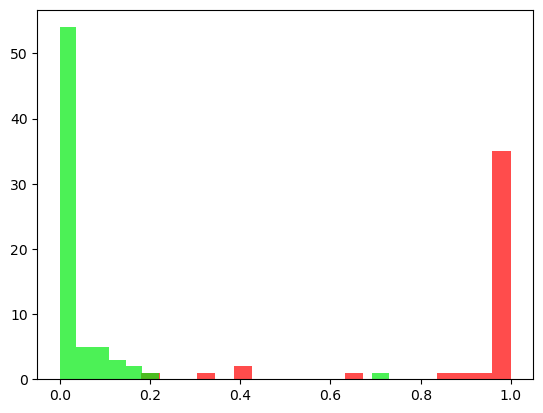

In [152]:
plt.hist(prob[y_test == 0], bins = 20, color = "#FF0000", alpha = .7);
plt.hist(prob[y_test == 1], bins = 20, color = "#00EC0E", alpha = .7);